<a href="https://colab.research.google.com/github/arlankazast/Arlan/blob/master/LoanEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# Disable display truncation 
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

df = pd.read_csv('drive/My Drive/loan.csv', low_memory = False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

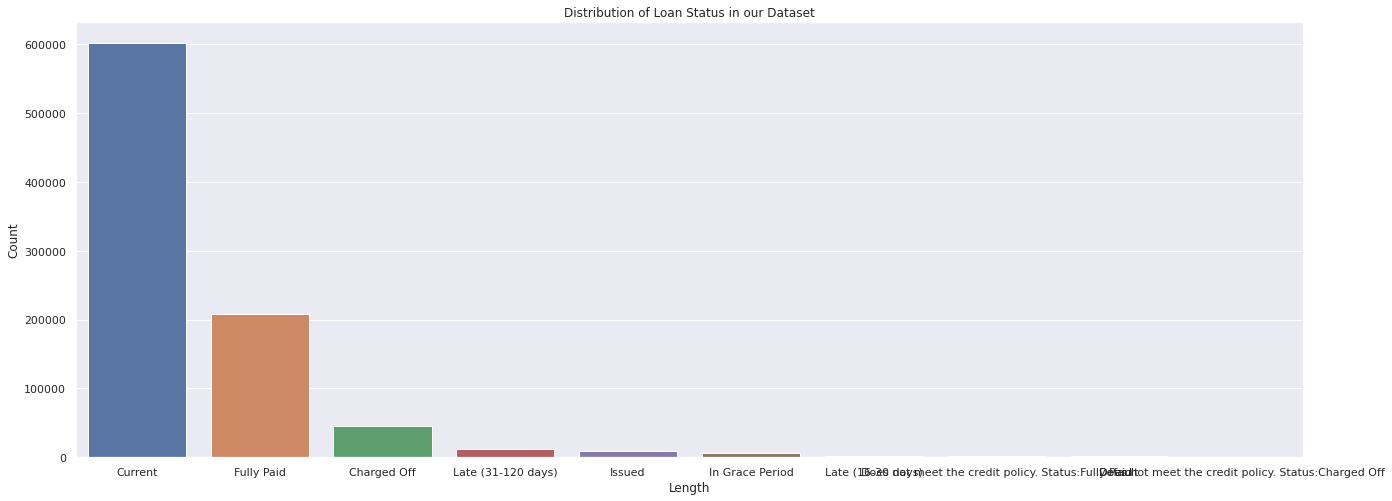

In [0]:
m =df['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(22,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()

In [0]:
(df.loan_status.value_counts()*100)/len(df)

Current                                                67.786469
Fully Paid                                             23.422854
Charged Off                                             5.113351
Late (31-120 days)                                      1.307927
Issued                                                  0.953423
In Grace Period                                         0.705270
Late (16-30 days)                                       0.265595
Does not meet the credit policy. Status:Fully Paid      0.222556
Default                                                 0.137384
Does not meet the credit policy. Status:Charged Off     0.085172
Name: loan_status, dtype: float64

In [0]:
  def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

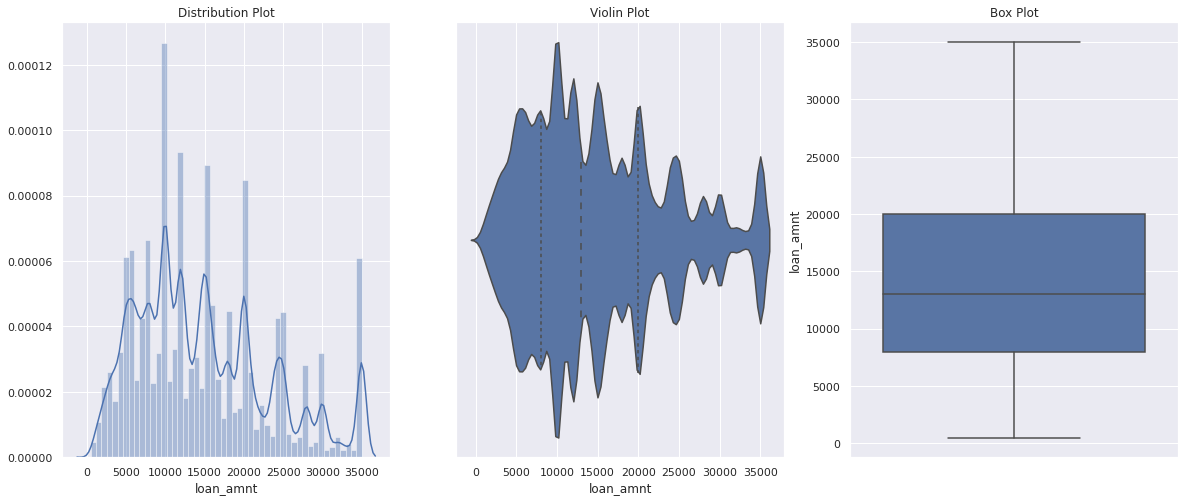

In [0]:
univariate(df=df,col='loan_amnt',vartype=0)
#Insights: Most of the loan amounts are distributed between 8000 to 20000 USD.

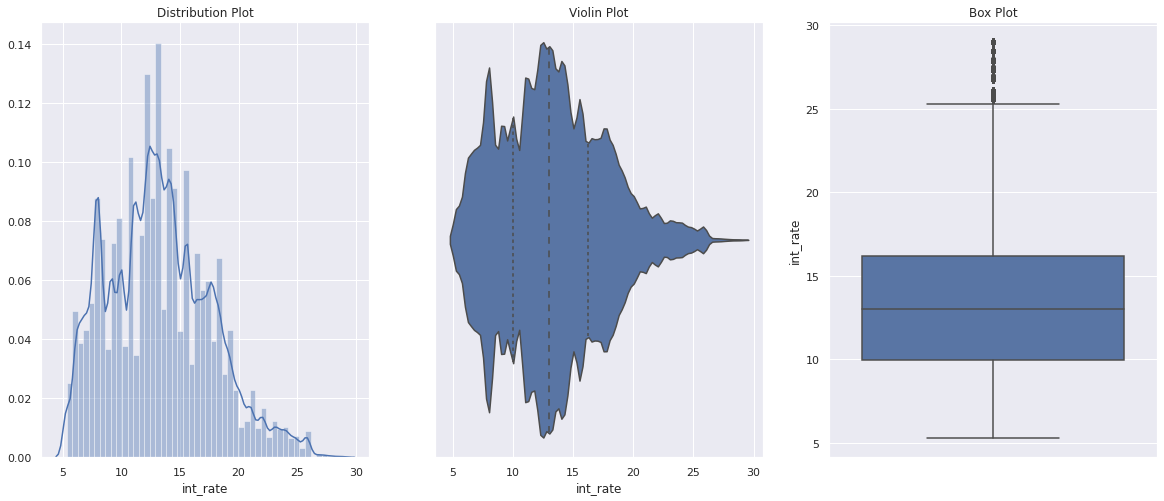

In [0]:
univariate(df=df,col='int_rate',vartype=0)
#Insights: Most of the loans interest rates are distributed between 10% to 16%.

In [0]:
df["annual_inc"].describe()

count    8.873750e+05
mean     7.502759e+04
std      6.469830e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [0]:
#Max value is 9500000 which is approx 150 times more than mean value, so we will remove the outliers from Annual Income.
#Remove Outliers (values from 99 to 100%)
q = df["annual_inc"].quantile(0.995)
df = df[df["annual_inc"] < q]
df["annual_inc"].describe()

count    882924.000000
mean      72819.815769
std       39928.399536
min           0.000000
25%       45000.000000
50%       64000.000000
75%       90000.000000
max      304800.000000
Name: annual_inc, dtype: float64

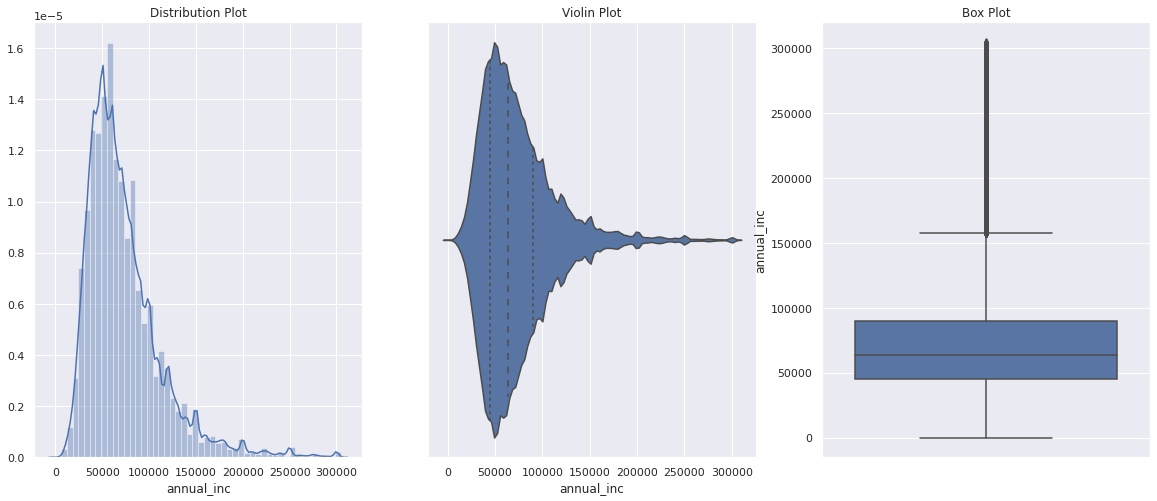

In [0]:
univariate(df=df,col='annual_inc',vartype=0)

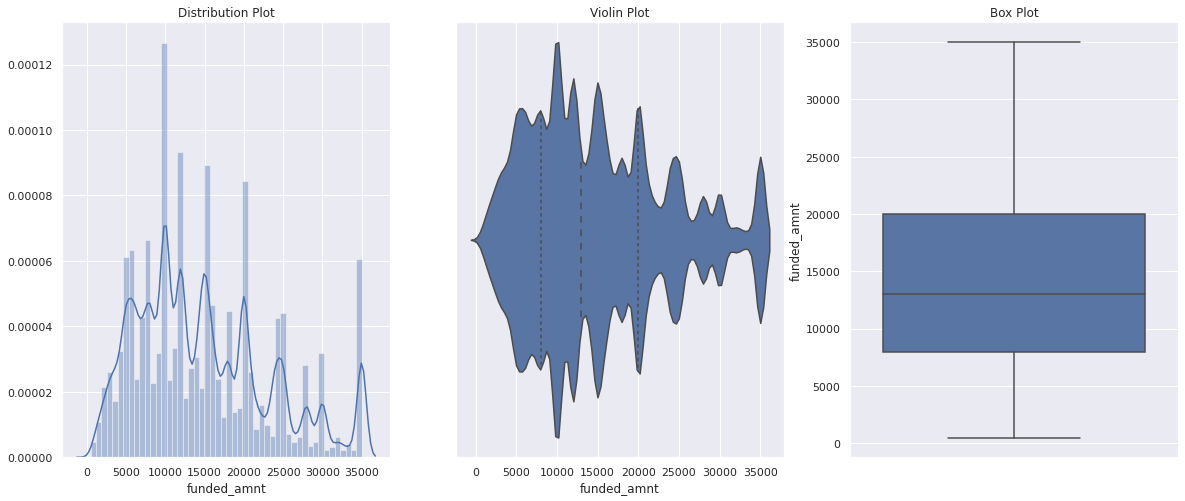

In [0]:
univariate(df=df,col='funded_amnt',vartype=0)

In [0]:
#now transforming the target variable
target = np.log(df['annual_inc'])
print ('Skewness is', target.skew())

Skewness is nan


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
# Calculate Good and Bad Loan Status Ratio
good_loan =  len(df[(df.loan_status == 'Fully Paid') |
                    (df.loan_status == 'Current') | 
                    (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid')])
print ('Good/Bad Loan Ratio: %.2f%%'  % (good_loan/len(df)*100))

Good/Bad Loan Ratio: 91.43%


In [0]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [0]:
df_heatmap = df.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','funded_amnt','funded_amnt_inv','loan_status'])
df_heatmap.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
funded_amnt            float64
funded_amnt_inv        float64
loan_status             object
dtype: object

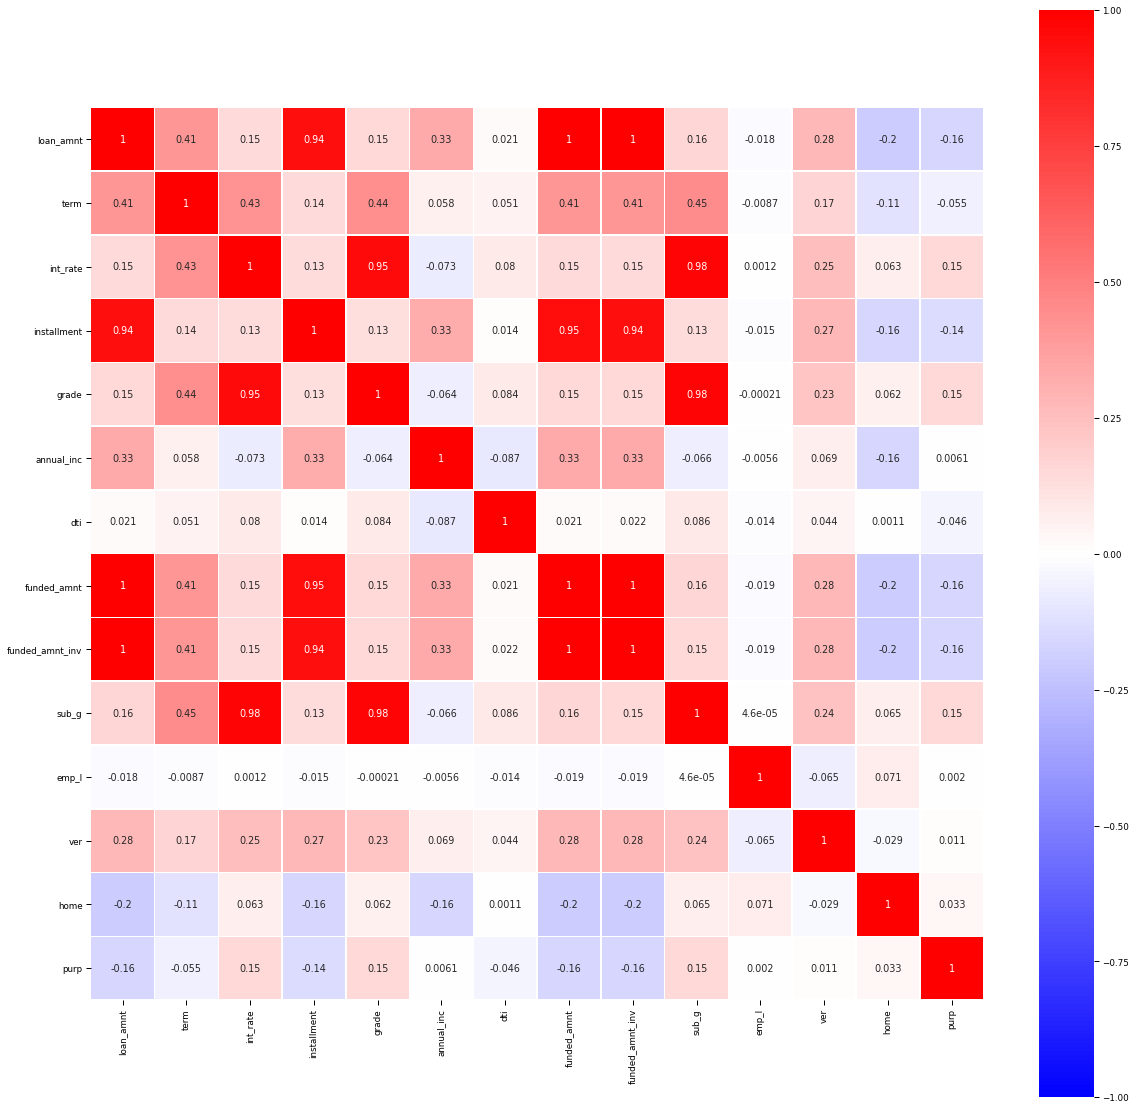

In [0]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_heatmap.assign(grade=df_heatmap.grade.astype('category').cat.codes,
                         sub_g=df_heatmap.sub_grade.astype('category').cat.codes,
                         term=df_heatmap.term.astype('category').cat.codes,
                        emp_l=df_heatmap.emp_length.astype('category').cat.codes,
                         ver =df_heatmap.verification_status.astype('category').cat.codes,
                        home=df_heatmap.home_ownership.astype('category').cat.codes,
                        purp=df_heatmap.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

In [0]:
df.drop([   'id',
             'member_id',
             'emp_title',
             'title',
             'url',
             'zip_code',
             'verification_status',
             'home_ownership',
             'issue_d',
             'earliest_cr_line',
             'last_pymnt_d',
             'next_pymnt_d',
             'desc',
#             'pymnt_plan',
#             'initial_list_status',
#             'addr_state',
             'last_credit_pull_d', 
                                    ], axis=1, inplace=True)

In [0]:

##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 

,Count,Percent
emp_length,44780,5.071784
delinq_2yrs,25,0.002832
inq_last_6mths,25,0.002832
mths_since_last_delinq,452358,51.234081
mths_since_last_record,746477,84.546008
open_acc,25,0.002832
pub_rec,25,0.002832
revol_util,489,0.055384
total_acc,25,0.002832
collections_12_mths_ex_med,140,0.015856


In [0]:
df.count().sort_values()

dti_joint                         509
annual_inc_joint                  511
verification_status_joint         511
il_util                         18516
mths_since_rcnt_il              20692
inq_last_12m                    21253
total_cu_tl                     21253
open_acc_6m                     21253
open_il_12m                     21253
open_il_24m                     21253
open_il_6m                      21253
total_bal_il                    21253
open_rv_12m                     21253
open_rv_24m                     21253
inq_fi                          21253
all_util                        21253
max_bal_bc                      21253
desc                           125520
mths_since_last_record         136447
mths_since_last_major_derog    220651
mths_since_last_delinq         430566
next_pymnt_d                   630971
total_rev_hi_lim               812935
tot_coll_amt                   812935
tot_cur_bal                    812935
emp_title                      831635
emp_length  

In [0]:
# Drop columns with less than 25% data.
lack_of_data_idx = [x for x in df.count() < 887379*0.25]
df.drop(df.columns[lack_of_data_idx], 1, inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   funded_amnt                 887379 non-null  float64
 2   term                        887379 non-null  object 
 3   int_rate                    887379 non-null  float64
 4   grade                       887379 non-null  object 
 5   emp_length                  842554 non-null  object 
 6   annual_inc                  887375 non-null  float64
 7   loan_status                 887379 non-null  object 
 8   pymnt_plan                  887379 non-null  object 
 9   purpose                     887379 non-null  object 
 10  addr_state                  887379 non-null  object 
 11  dti                         887379 non-null  float64
 12  delinq_2yrs                 887350 non-null  float64
 13  inq_last_6mths

In [0]:
df.isnull().sum()

loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
grade                              0
emp_length                     44825
annual_inc                         4
loan_status                        0
pymnt_plan                         0
purpose                            0
addr_state                         0
dti                                0
delinq_2yrs                       29
inq_last_6mths                    29
mths_since_last_delinq        454312
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       502
total_acc                         29
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
t

In [0]:
print (df.mths_since_last_delinq.min(), df.mths_since_last_delinq.max())
print(df.mths_since_last_delinq.mean())
print(df.mths_since_last_delinq.median())

0.0 188.0
34.08653261056377
31.0


In [0]:
df.mths_since_last_delinq = df.mths_since_last_delinq.fillna(df.mths_since_last_delinq.median())

In [0]:
df.dropna(inplace=True)#null values to drop

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769851 entries, 42535 to 887378
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   769851 non-null  float64
 1   funded_amnt                 769851 non-null  float64
 2   funded_amnt_inv             769851 non-null  float64
 3   term                        769851 non-null  object 
 4   int_rate                    769851 non-null  float64
 5   installment                 769851 non-null  float64
 6   grade                       769851 non-null  object 
 7   sub_grade                   769851 non-null  object 
 8   emp_length                  769851 non-null  object 
 9   annual_inc                  769851 non-null  float64
 10  loan_status                 769851 non-null  object 
 11  pymnt_plan                  769851 non-null  object 
 12  purpose                     769851 non-null  object 
 13  addr_state

LinAlgError: ignored

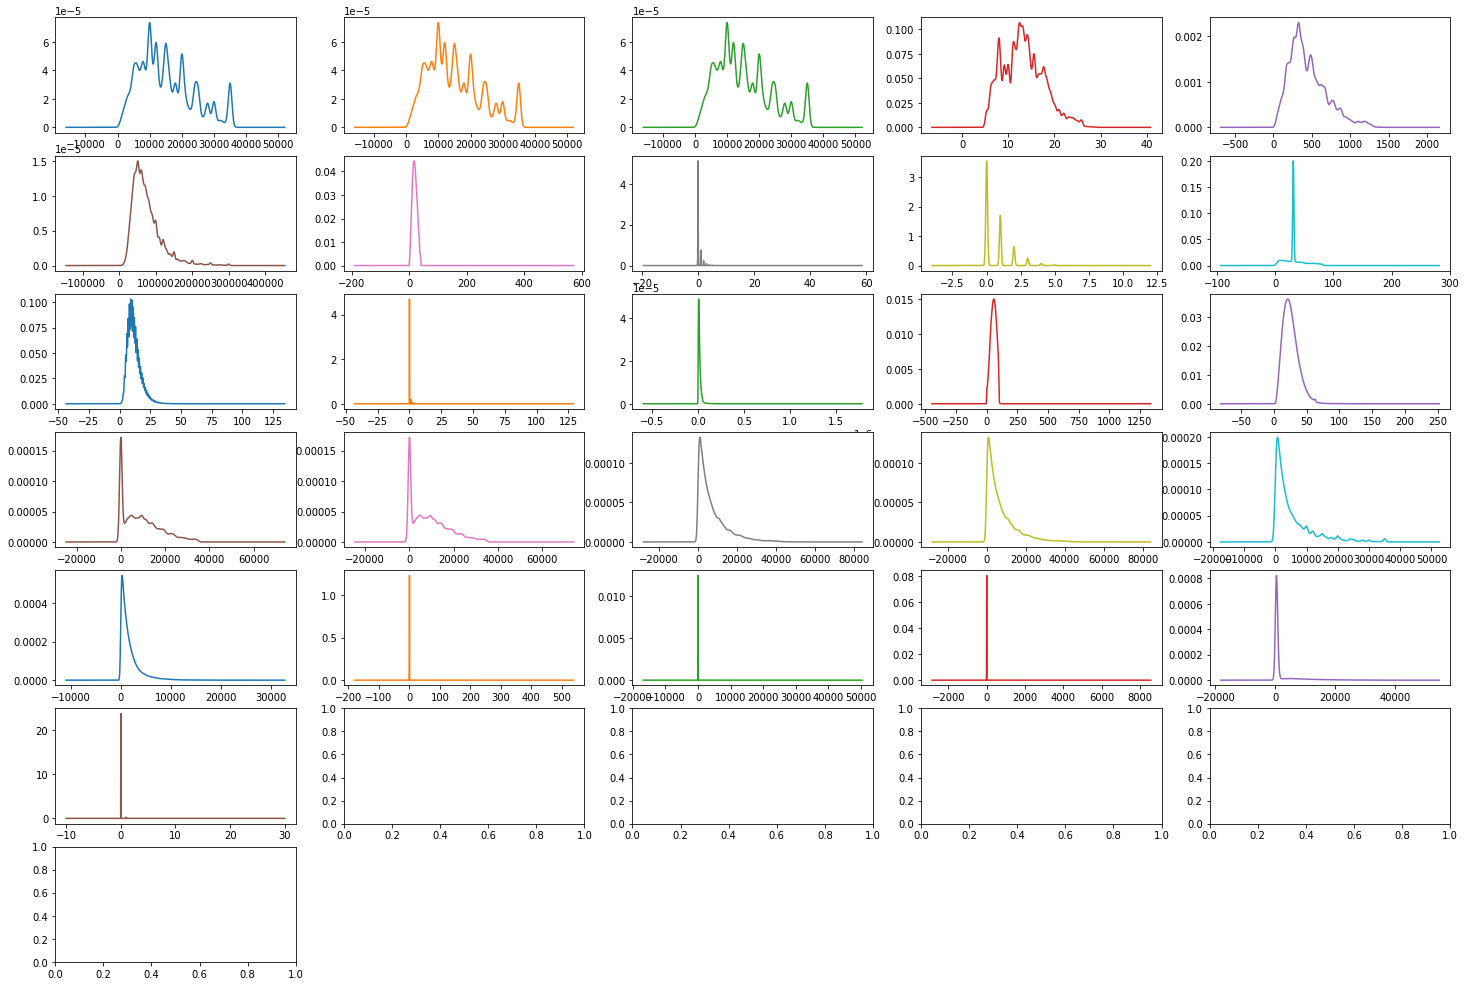

In [0]:
df.plot(kind='density', subplots=True, layout=(10,5), sharex=False, figsize=(25,25) )
plt.show()

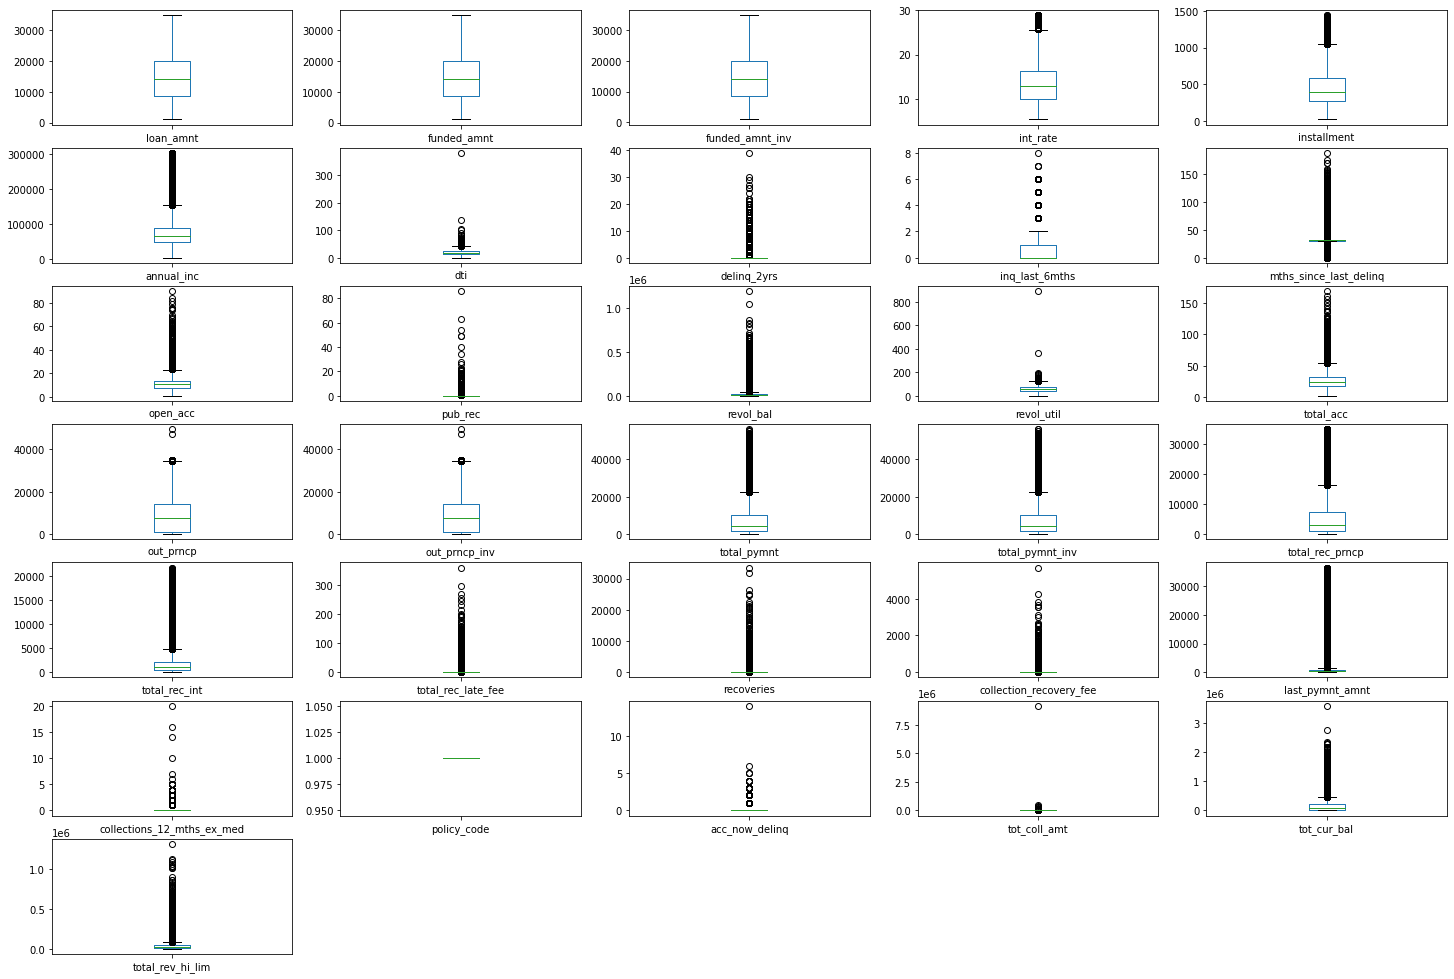

In [0]:
df.plot(kind='box', subplots=True, layout=(10,5), sharex=False, figsize=(25,25) )
plt.show()

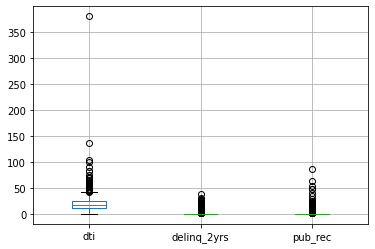

In [0]:
boxplot1 = df.boxplot(column=['dti','delinq_2yrs', 'pub_rec'])

In [0]:
# Calculate Good and Bad Loan Status Ratio
good_loan =  len(df[(df.loan_status == 'Fully Paid') |
                    (df.loan_status == 'Current') | 
                    (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid')])
print ('Good/Bad Loan Ratio: %.2f%%'  % (good_loan/len(df)*100))

Good/Bad Loan Ratio: 92.11%


In [0]:
# create an bad/good loan indicator feature
df['good_loan'] = np.where((df.loan_status == 'Fully Paid') |
                        (df.loan_status == 'Current') | 
                        (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)
#Loan Status : merge records where values are less than 1.5%
#As we can see, Other than ['Current','Fully Paid' & Charged off] other loan_status are not relevant for our analysis, so we can merge them into good and bad

NameError: ignored

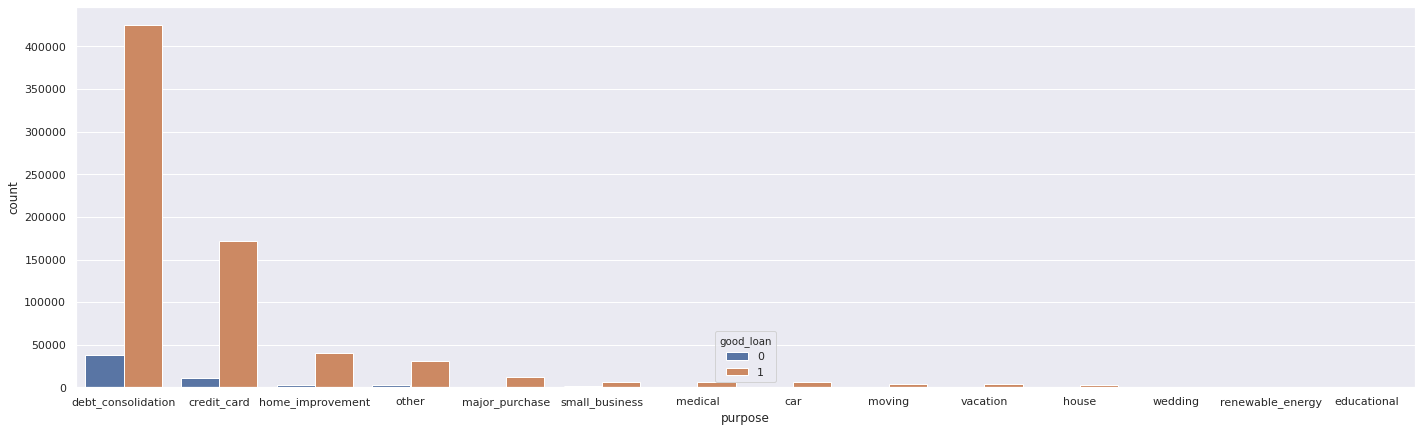

In [0]:
univariate(df=df,col='purpose',vartype=1,hue='good_loan')

NameError: ignored

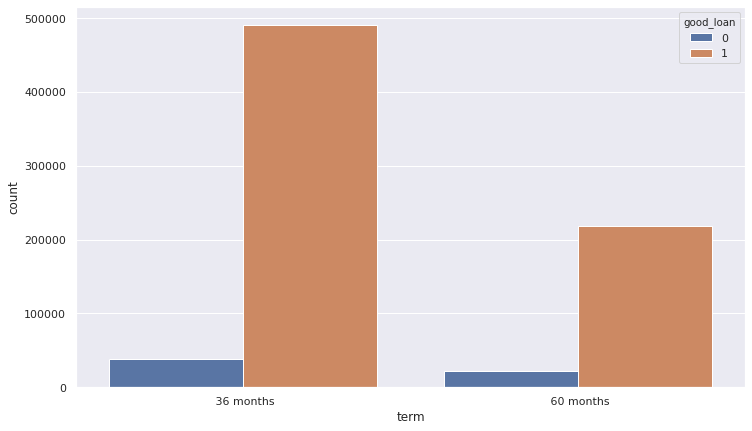

In [0]:
univariate(df=df,col='term',vartype=1,hue='good_loan')

In [0]:
loan_correlation = df.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_loan
loan_amnt,1.000000,0.999999,0.999994,0.134208,0.943500,0.473833,0.038812,-0.008514,-0.028926,-0.026740,0.183311,-0.087242,0.357683,0.119105,0.209957,0.665442,0.665451,0.466387,0.466432,0.378714,0.532075,0.037149,0.070214,0.057397,0.216291,-0.020586,NaN,0.000785,-0.004043,0.319989,0.365834,-0.011722
funded_amnt,0.999999,1.000000,0.999995,0.134206,0.943502,0.473830,0.038812,-0.008515,-0.028930,-0.026738,0.183308,-0.087242,0.357683,0.119105,0.209954,0.665446,0.665455,0.466387,0.466431,0.378715,0.532073,0.037150,0.070202,0.057396,0.216292,-0.020586,NaN,0.000785,-0.004043,0.319987,0.365833,-0.011718
funded_amnt_inv,0.999994,0.999995,1.000000,0.134100,0.943487,0.473893,0.038728,-0.008518,-0.028912,-0.026724,0.183319,-0.087222,0.357675,0.119032,0.209972,0.665490,0.665505,0.466333,0.466384,0.378651,0.532079,0.037146,0.070188,0.057386,0.216277,-0.020600,NaN,0.000773,-0.004042,0.320008,0.365874,-0.011731
int_rate,0.134208,0.134206,0.134100,1.000000,0.120581,-0.121667,0.159034,0.048229,0.243815,-0.013268,-0.018569,0.049661,-0.047541,0.248482,-0.043122,0.033798,0.033647,0.173218,0.173293,0.056903,0.449976,0.058606,0.108761,0.079620,0.100666,0.012470,NaN,0.026633,0.001178,-0.093142,-0.197804,-0.163020
installment,0.943500,0.943502,0.943487,0.120581,1.000000,0.460195,0.022842,-0.000279,0.004752,-0.028306,0.167268,-0.075810,0.335487,0.128751,0.187004,0.558988,0.558986,0.513707,0.513757,0.444247,0.500008,0.047925,0.073771,0.060171,0.229540,-0.017757,NaN,0.003516,-0.003327,0.285969,0.332743,-0.023685
annual_inc,0.473833,0.473830,0.473893,-0.121667,0.460195,1.000000,-0.231607,0.063867,0.050981,-0.042949,0.188876,-0.012618,0.375307,0.058020,0.264554,0.307202,0.307260,0.226112,0.226150,0.209037,0.180921,0.021019,0.010969,0.010728,0.122015,-0.005756,NaN,0.018520,0.002368,0.537274,0.383666,0.038745
dti,0.038812,0.038812,0.038728,0.159034,0.022842,-0.231607,1.000000,-0.014865,-0.005342,-0.000237,0.297838,-0.060221,0.162477,0.167810,0.225385,0.097722,0.097638,-0.065877,-0.065884,-0.087452,0.030247,-0.001077,0.007260,0.010329,-0.055823,-0.004968,NaN,0.005403,-0.004417,0.003199,0.099834,-0.034879
delinq_2yrs,-0.008514,-0.008515,-0.008518,0.048229,-0.000279,0.063867,-0.014865,1.000000,0.026562,-0.482110,0.045485,-0.014855,-0.041045,-0.019845,0.119773,0.015343,0.015330,-0.024817,-0.024808,-0.030277,0.003310,0.020374,0.000137,0.001269,-0.018801,0.062873,NaN,0.130594,0.000264,0.064427,-0.052296,-0.007471
inq_last_6mths,-0.028926,-0.028930,-0.028912,0.243815,0.004752,0.050981,-0.005342,0.026562,1.000000,0.017466,0.124398,0.067140,-0.022940,-0.088071,0.146213,-0.096225,-0.096252,0.079125,0.079189,0.061878,0.091780,0.019660,0.044337,0.031991,0.063353,0.010135,NaN,-0.004708,0.003004,0.031398,0.004082,-0.065556
mths_since_last_delinq,-0.026740,-0.026738,-0.026724,-0.013268,-0.028306,-0.042949,-0.000237,-0.482110,0.017466,1.000000,-0.025329,0.077612,-0.025073,0.003992,-0.015206,-0.020408,-0.020397,-0.011472,-0.011470,-0.006205,-0.022721,-0.015211,-0.003283,-0.002945,0.003106,-0.025843,NaN,-0.135060,0.007270,-0.062003,-0.031953,0.007040


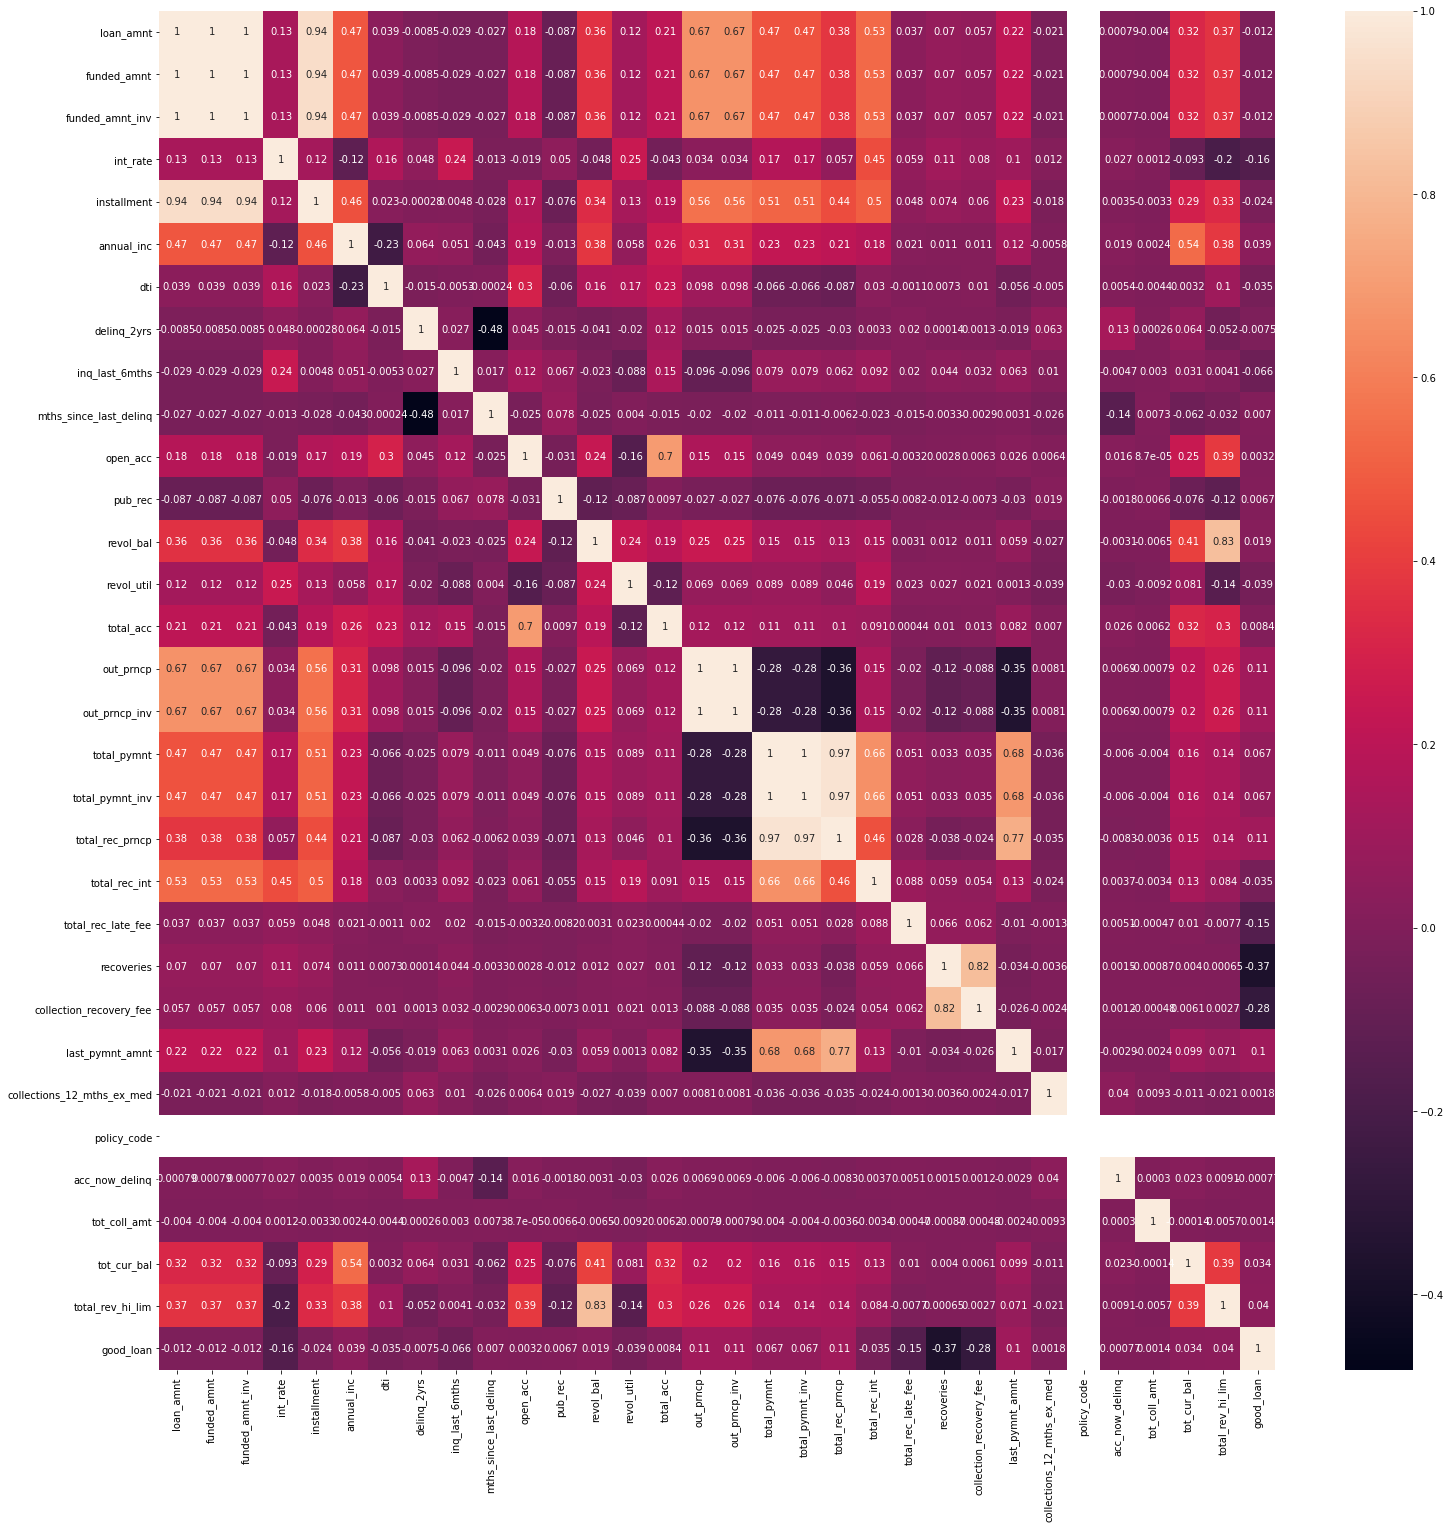

In [0]:
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [0]:
df.head(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_loan
42535,27050.0,27050.0,36 months,10.99,B,10+ years,55000.0,Current,n,debt_consolidation,MI,22.87,0.0,0.0,31.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,1
42536,9750.0,9750.0,36 months,13.98,C,1 year,26000.0,Current,n,debt_consolidation,CA,25.12,0.0,0.0,31.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,1
42537,12000.0,12000.0,36 months,6.62,A,10+ years,105000.0,Current,n,debt_consolidation,CT,14.05,0.0,1.0,43.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,1
42538,12000.0,12000.0,36 months,13.53,B,10+ years,40000.0,Fully Paid,n,debt_consolidation,NM,16.94,0.0,0.0,53.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1
42539,15000.0,15000.0,36 months,8.90,A,2 years,63000.0,Current,n,debt_consolidation,FL,16.51,0.0,0.0,34.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,1


In [0]:
# Hot encode  categorical features 
columns = ['term', 'grade', 'sub_grade', 'emp_length', 'purpose', 'application_type','addr_state',
           'pymnt_plan', 'initial_list_status']

for col in columns:
    tmp_df = pd.get_dummies(df[col], prefix=col)
    df = pd.concat((df, tmp_df), axis=1)

In [0]:
# drop attributes that we hot-encoded
df.drop(['loan_status',
           'term',
           'grade',
           'sub_grade',
           'emp_length',
           'addr_state',
           'initial_list_status',
           'pymnt_plan',
           'purpose',
           'application_type'], axis=1, inplace=True)

In [0]:
# Rename some features to concur w/ some algorithms
df = df.rename(columns= {'emp_length_< 1 year':'emp_length_lt_1 year',
                         'emp_length_n/a':'emp_length_na'})

In [0]:
df.drop(['sub_grade',
           ], axis=1, inplace=True)

KeyError: ignored

In [0]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_loan,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w
42535,27050.0,27050.0,27050.0,10.99,885.46,55000.0,22.87,0.0,0.0,31.0,14.0,0.0,36638.0,61.2,27.0,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,1.0,0.0,0.0,114834.0,59900.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
42536,9750.0,9750.0,9750.0,13.98,333.14,26000.0,25.12,0.0,0.0,31.0,12.0,0.0,7967.0,52.8,28.0,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,1.0,0.0,0.0,14123.0,15100.0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
42537,12000.0,12000.0,12000.0,6.62,368.45,105000.0,14.05,0.0,1.0,43.0,12.0,0.0,13168.0,21.6,22.0,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,1.0,0.0,0.0,267646.0,61100.0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
42538,12000.0,12000.0,12000.0,13.53,407.40,40000.0,16.94,0.0,0.0,53.0,7.0,2.0,5572.0,68.8,32.0,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,1.0,0.0,15386.0,13605.0,8100.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
42539,15000.0,15000.0,15000.0,8.90,476.30,63000.0,16.51,0.0,0.0,34.0,8.0,0.0,11431.0,74.2,29.0,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,1.0,0.0,1514.0,272492.0,15400.0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
# Split Train/Test data
from sklearn.model_selection import train_test_split

y = df['good_loan']
X = df.iloc[:, df.columns != 'good_loan']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=44)

In [0]:
sc = StandardScaler()
Xunb = traindata.drop('loan_status', axis=1)
yunb = traindata['loan_status']
numerical = Xunb.columns[(Xunb.dtypes == 'float64') | (Xunb.dtypes == 'int64')].tolist()
Xunb[numerical] = sc.fit_transform(Xunb[numerical])

In [0]:
browse_notes = pd.read_excel('drive/My Drive/LCDataDictionary (1).xlsx',sheet_name=1)
browse_notes.head(30)

,BrowseNotesFile,Description
0,acceptD,The date which the borrower accepted the offer
1,accNowDelinq,The number of accounts on which the borrower i...
2,accOpenPast24Mths,Number of trades opened in past 24 months.
3,addrState,The state provided by the borrower in the loan...
4,annual_inc_joint,The combined self-reported annual income provi...
5,annualInc,The self-reported annual income provided by th...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bcOpenToBuy,Total open to buy on revolving bankcards.
9,bcUtil,Ratio of total current balance to high credit/...


Distribution of Columns


KeyError: ignored

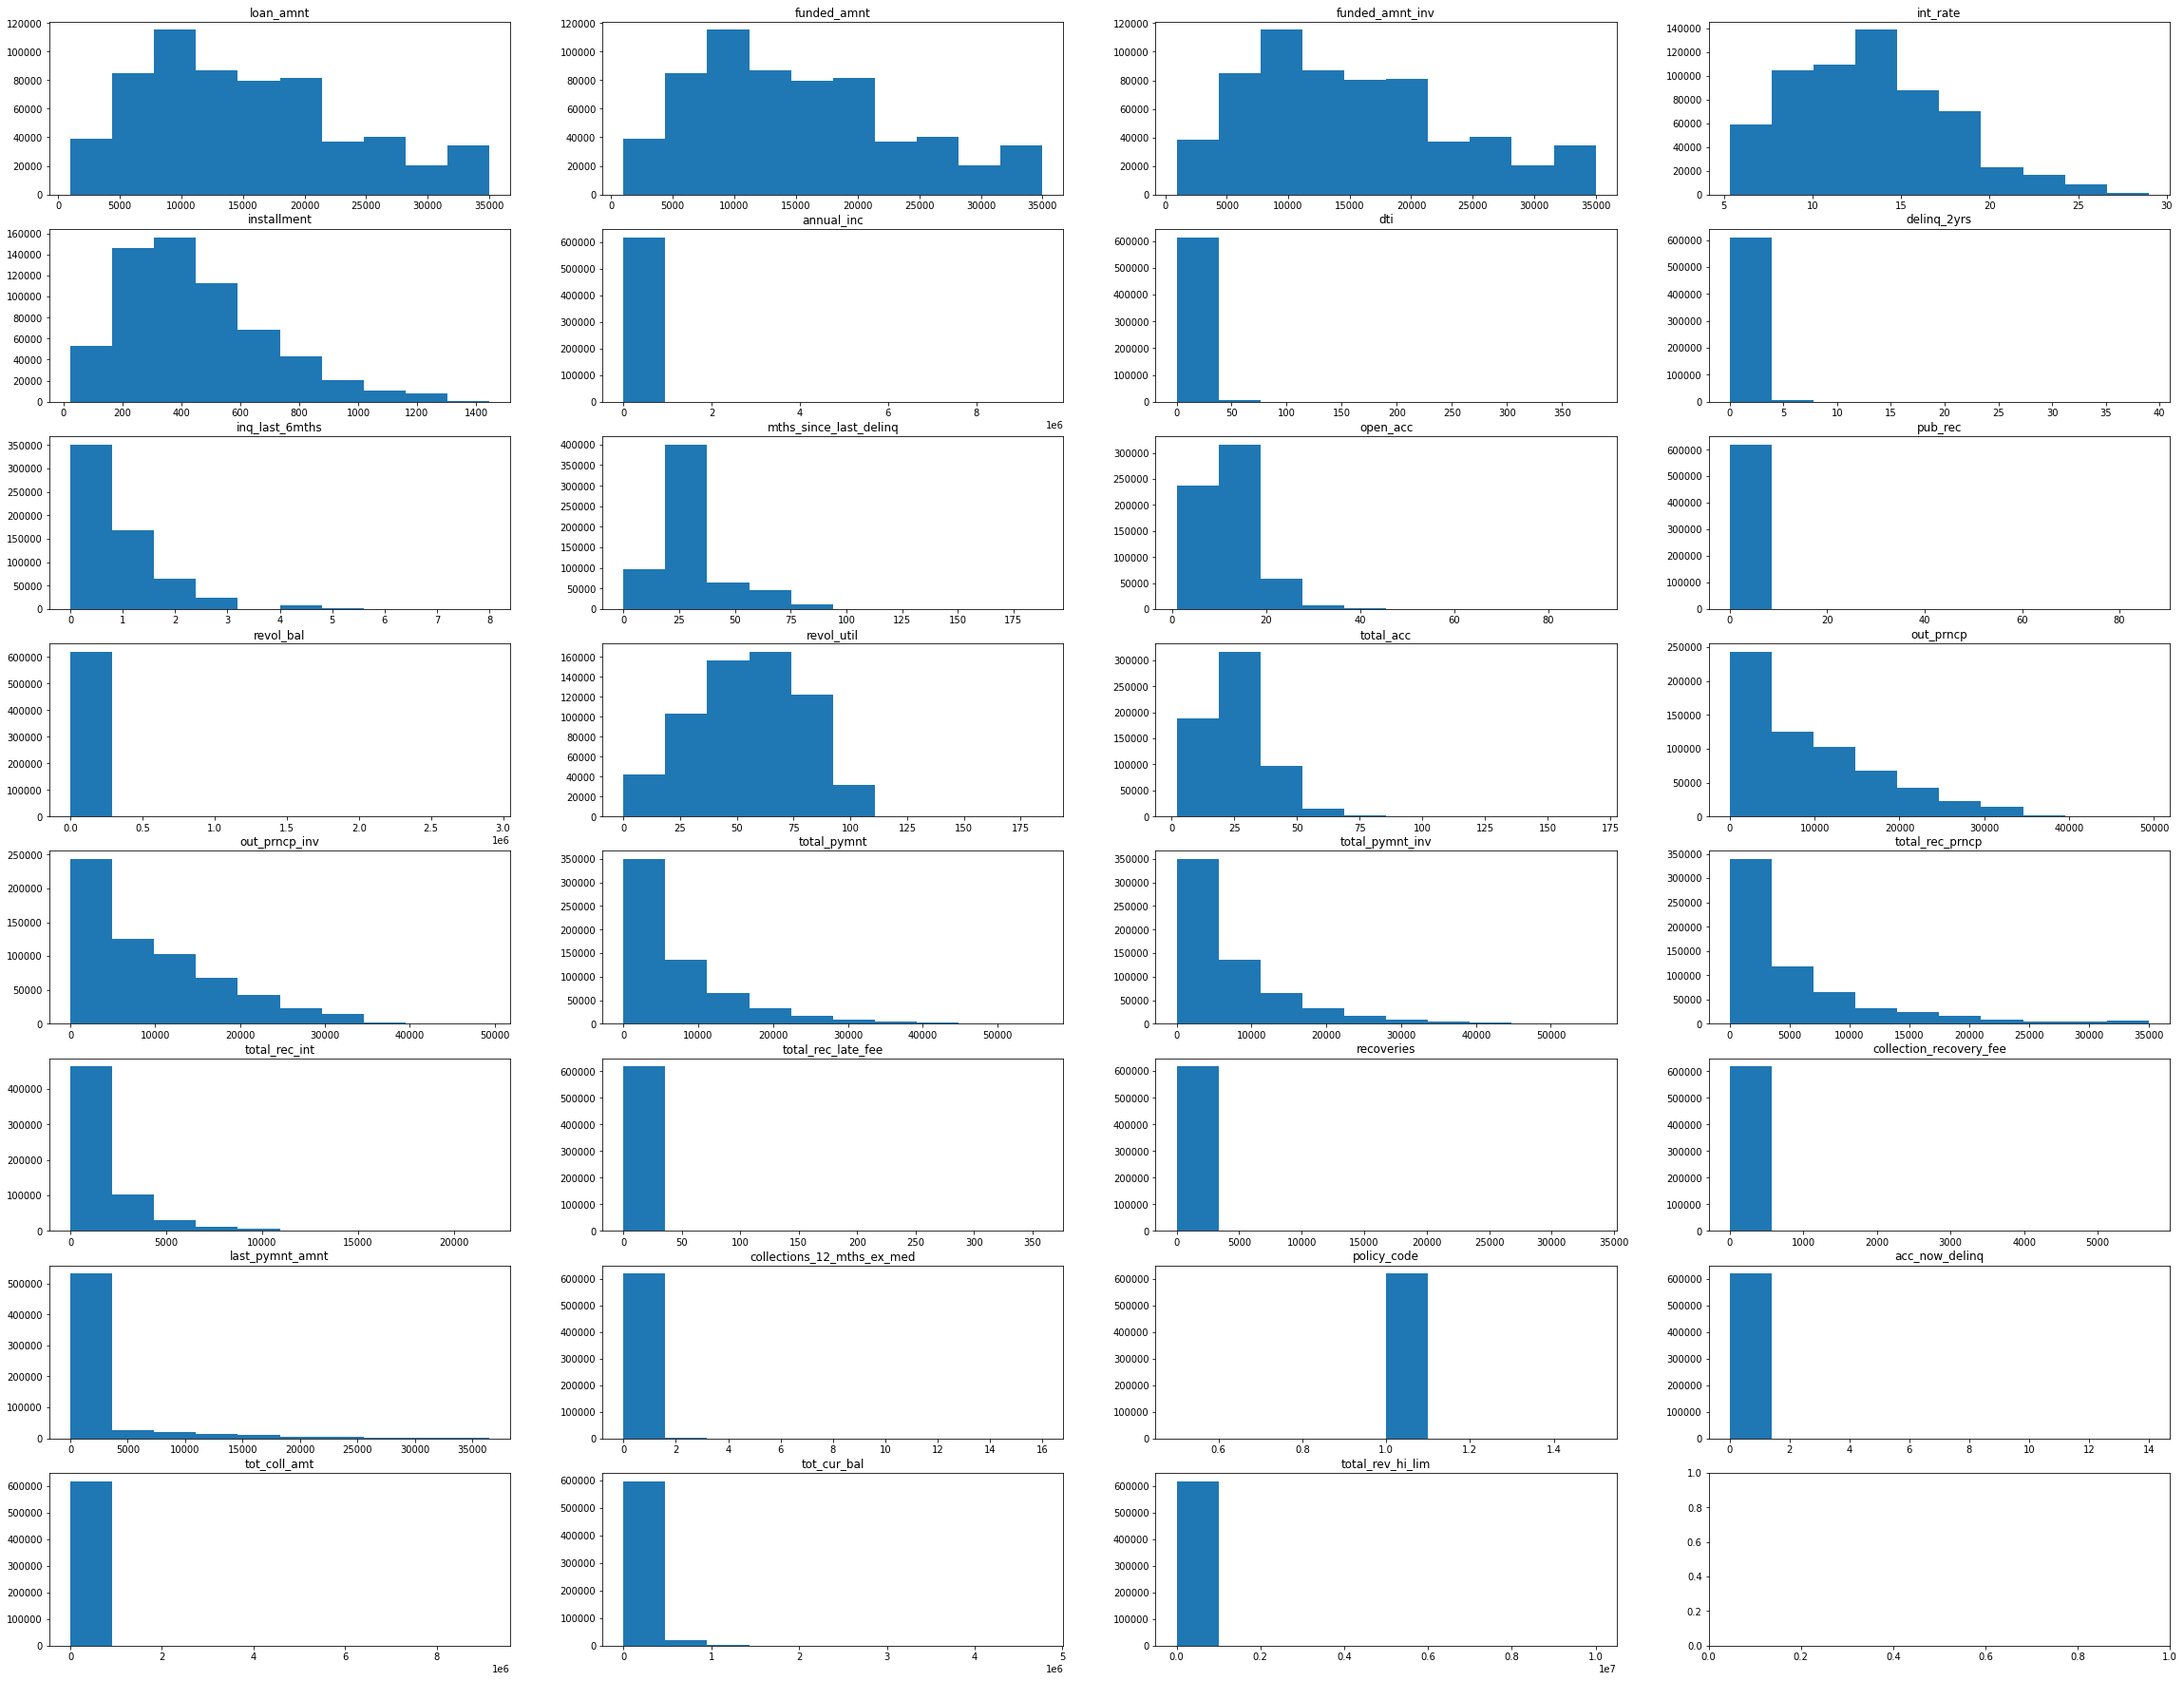

In [0]:
#histograms are used to check distribution of data  
print("Distribution of Columns")
plt.figure(figsize=(40,200))
for i,col in enumerate(df):
    plt.subplot(50,4,i+1)
    plt.hist(X_train[col])
    plt.title(col)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [0]:
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {#'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            #'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
        #cross_validation[clf_name] = cross_val_score(clfs,X_test,y_test,cv=10,scoring='roc_auc')
        average_precision = average_precision_score(y_test, y_score)
        print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
        ax[0].set_xlabel('false positive rate')
        ax[0].set_ylabel('true positive rate')
        ax[0].set_title('ROC curve - {}'.format(model_type))
        ax[0].plot(fpr, tpr,color='darkorange', label = clf_name )
        ax[0].legend(loc=2, prop={'size':11})
        ax[0].plot([0,1],[0,1], color = 'navy',linestyle='--')

        ax[1].disp = plot_precision_recall_curve(clf, X_test, y_test)
        ax[1].disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
        #disp = plot_precision_recall_curve(clf, X_test, y_test)
        #disp.ax_.set_title('2-class Precision-Recall curve: '
                   #'AP={0:0.2f}'.format(average_precision))

        #plt.figure(1, figsize=(6,6))
        #plt.xlabel('false positive rate')
        #plt.ylabel('true positive rate')
        #plt.title('ROC curve - {}'.format(model_type))
        #plt.plot(fpr, tpr,color='darkorange', label = clf_name )
        #plt.legend(loc=2, prop={'size':11})
    #plt.plot([0,1],[0,1], color = 'navy',linestyle='--')
    
    return models_report, conf_matrix

computing RandomForestClassifier - Non-balanced 
Average precision-recall score: 0.99


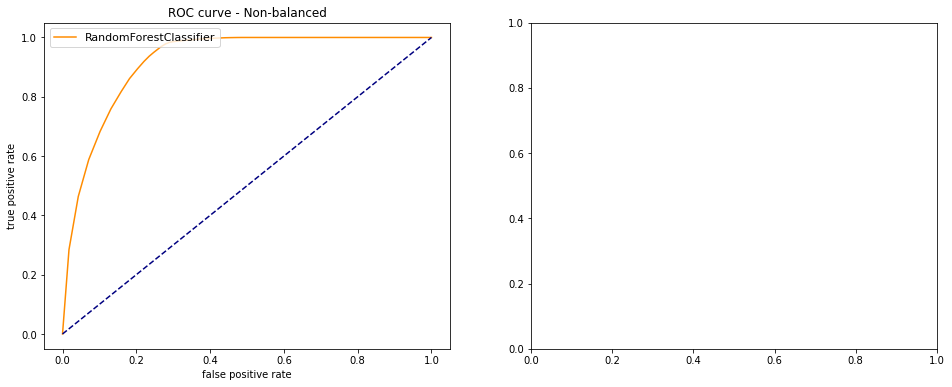

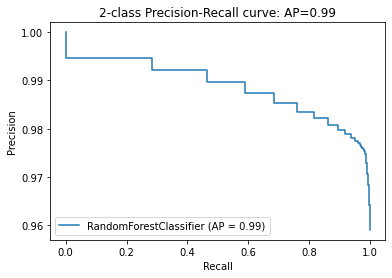

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')

In [0]:
models_report

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,RandomForestClassifier,0.738343,0.918464,0.968277,0.995119,0.981515,Non-balanced


In [0]:
conf_matrix['RandomForestClassifier']

Predicted,0,1
True,,
0,7578,4622
1,692,141079


In [0]:
index_split = int(len(X)/2)
X_train_res, y_train_res = SMOTE().fit_sample(X.iloc[0:index_split, :], y.iloc[0:index_split])
#X_test_res, y_test_res = X.iloc[index_split:], y.iloc[index_split:]

#scores = cross_val_score(clf, X_test,y_test, cv=10, scoring='roc_auc')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


computing RandomForestClassifier - Balanced 
Average precision-recall score: 0.99


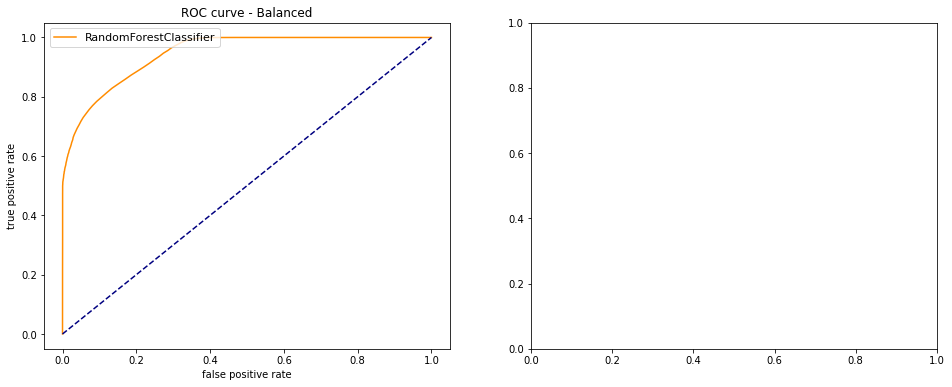

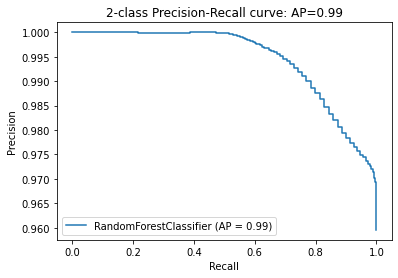

In [0]:
models_report_bal, conf_matrix_bal = run_models(X_train_res, y_train_res, X_test, y_test, model_type = 'Balanced')

In [0]:
models_report_bal

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,RandomForestClassifier,0.337779,0.945442,0.996851,0.638544,0.778446,Balanced


In [0]:
conf_matrix_bal['RandomForestClassifier']

Predicted,0,1
True,,
0,11945,282
1,50427,91317


In [0]:
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {#'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            #'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
        #cross_validation[clf_name] = cross_val_score(clfs,X_test,y_test,cv=10,scoring='roc_auc')

        average_precision = average_precision_score(y_test, y_score)
        print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
        ax[0].set_xlabel('false positive rate')
        ax[0].set_ylabel('true positive rate')
        ax[0].set_title('ROC curve - {}'.format(model_type))
        ax[0].plot(fpr, tpr,color='darkorange', label = clf_name )
        ax[0].legend(loc=2, prop={'size':11})
        ax[0].plot([0,1],[0,1], color = 'navy',linestyle='--')

        ax[1].disp = plot_precision_recall_curve(clf, X_test, y_test)
        ax[1].disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
        
        #plt.figure(1, figsize=(6,6))
        #plt.xlabel('false positive rate')
        #plt.ylabel('true positive rate')
        #plt.title('ROC curve - {}'.format(model_type))
        #plt.plot(fpr, tpr,color='darkorange', label = clf_name )
        #plt.legend(loc=2, prop={'size':11})
    #plt.plot([0,1],[0,1], color = 'navy',linestyle='--')

    
    return models_report, conf_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


computing LogisticRegression - Non-balanced 


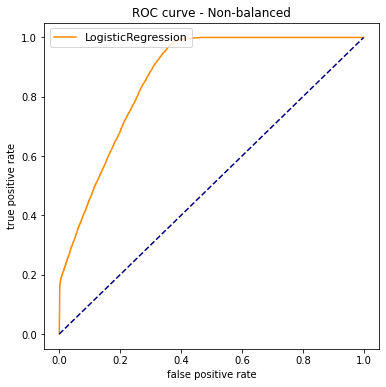

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')

In [0]:
models_report

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,LogisticRegression,0.717883,0.862731,0.961865,0.999874,0.980501,Non-balanced


In [0]:
conf_matrix['LogisticRegression']

Predicted,0,1
True,,
0,6567,5652
1,18,142557


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


computing LogisticRegression - Balanced 
Average precision-recall score: 0.98


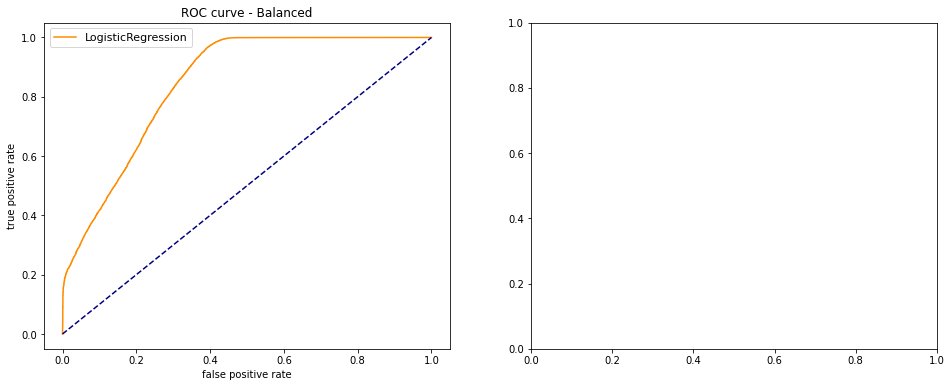

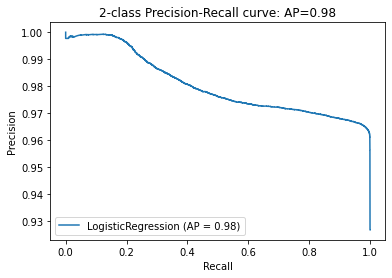

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
index_split = int(len(X)/2)
X_train_res, y_train_res = SMOTE().fit_sample(X.iloc[0:index_split, :], y.iloc[0:index_split])
#X_test_res, y_test_res = X.iloc[index_split:], y.iloc[index_split:]

#scores = cross_val_score(clf, X_test,y_test, cv=10, scoring='roc_auc')

models_report_bal, conf_matrix_bal = run_models(X_train_res, y_train_res, X_test, y_test, model_type = 'Balanced')

In [0]:
models_report_bal

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,LogisticRegression,0.271969,0.848267,0.972752,0.702943,0.816126,Balanced


In [0]:
conf_matrix_bal['LogisticRegression']

Predicted,0,1
True,,
0,9436,2791
1,42106,99638


In [0]:

clf = GradientBoostingClassifier(max_depth=5, n_estimators=100, max_features = 0.3)
clf.fit(X_train, y_train)
train_score = clf.score(X_train_res, y_train_res)
test_score = clf.score(X_test, y_test)
gb_cross_val_score = cross_val_score(clf,X_test,y_test,cv=10,scoring='roc_auc')

In [0]:
print(gb_cross_val_score)
print(gb_cross_val_score.mean())

[0.91975519 0.93115646 0.92245915 0.91915355 0.92261411 0.92828787
 0.92958189 0.92249363 0.92507307 0.92473667]
0.9245311601804278


In [0]:
clfRF = RandomForestClassifier(n_estimators=100)
clfRF.fit(X_train_res, y_train_res)
train_score = clfRF.score(X_train_res, y_train_res)
test_score = clfRF.score(X_test_res, y_test_res)
rf_cross_val_score = cross_val_score(clfRF,X_test,y_test,cv=10,scoring='roc_auc')

In [0]:
print(rf_cross_val_score)
print(rf_cross_val_score.mean())

[0.90408905 0.90884151 0.91342549 0.90519383 0.91766049 0.91592142
 0.90924489 0.90723361 0.92418075 0.90766092]
0.9113451971173646


In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
clfLR = LogisticRegression()
clfLR.fit(X_train_res, y_train_res)
train_score = clfLR.score(X_train_res, y_train_res)
test_score = clfLR.score(X_test_res, y_test_res)
lr_cross_val_score = cross_val_score(clfLR,X_test,y_test,cv=10,scoring='roc_auc')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
print(lr_cross_val_score)
print(lr_cross_val_score.mean())

[0.85386876 0.85734709 0.87538819 0.87136426 0.86484212 0.86125138
 0.86154543 0.85677561 0.86725985 0.861923  ]
0.8631565683621139


In [0]:
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth=5, n_estimators=100, max_features = 0.3),
            #'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            #'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
        #cross_validation[clf_name] = cross_val_score(clfs,X_test,y_test,cv=10,scoring='roc_auc')

        average_precision = average_precision_score(y_test, y_score)
        print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
        ax[0].set_xlabel('false positive rate')
        ax[0].set_ylabel('true positive rate')
        ax[0].set_title('ROC curve - {}'.format(model_type))
        ax[0].plot(fpr, tpr,color='darkorange', label = clf_name )
        ax[0].legend(loc=2, prop={'size':11})
        ax[0].plot([0,1],[0,1], color = 'navy',linestyle='--')

        ax[1].disp = plot_precision_recall_curve(clf, X_test, y_test)
        ax[1].disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
        
        #plt.figure(1, figsize=(6,6))
        #plt.xlabel('false positive rate')
        #plt.ylabel('true positive rate')
        #plt.title('ROC curve - {}'.format(model_type))
        #plt.plot(fpr, tpr,color='darkorange', label = clf_name )
        #plt.legend(loc=2, prop={'size':11})
    #plt.plot([0,1],[0,1], color = 'navy',linestyle='--')

    
    return models_report, conf_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


computing GradientBoosting - Balanced 
Average precision-recall score: 0.98


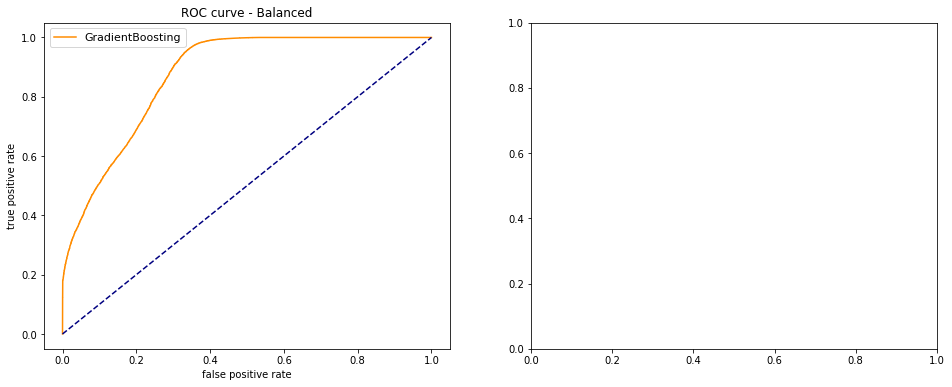

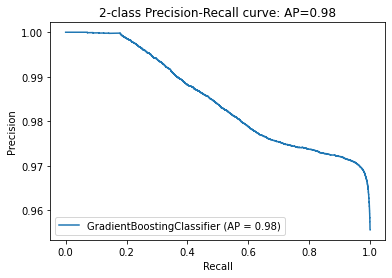

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
index_split = int(len(X)/2)
X_train_res, y_train_res = SMOTE().fit_sample(X.iloc[0:index_split, :], y.iloc[0:index_split])
#X_test_res, y_test_res = X.iloc[index_split:], y.iloc[index_split:]

#scores = cross_val_score(clf, X_test,y_test, cv=10, scoring='roc_auc')

models_report_bal, conf_matrix_bal = run_models(X_train_res, y_train_res, X_test, y_test, model_type = 'Balanced')

In [0]:
models_report_bal

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.462135,0.872642,0.972056,0.903203,0.936366,Balanced


In [0]:
conf_matrix_bal['GradientBoosting']

Predicted,0,1
True,,
0,8421,3806
1,8374,133370


In [0]:
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth=6, n_estimators=2000, max_features = 0.3, learning_rate = 0.05),
            #'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            #'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
        #cross_validation[clf_name] = cross_val_score(clfs,X_test,y_test,cv=10,scoring='roc_auc')
        
        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr,color='darkorange', label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'navy',linestyle='--')

    
    return models_report, conf_matrix